In [2]:
# You'll already seen one Non-linear regression Model. The Polynomial Regression model.
# Here we see the second one. SVR or Support Vector Regression.

# What is Support Vector Regression. 
# In Ordinary Least Squares Regression, we create a trend line based on the residuals of all the data points.

# In Support Vector Regression, we create a tube instead of a trend line. We have a trend line in the middle of the
# tube and two parallel lines above and below the trend line forming a tube. All of the datasets inside the tube do
# not contribute any error in the regression. ie those data points are ignored. Only points which are outside the tube
# are important as those contribute to the error which needs to be minimized in order to get to the most effecient
# tube equation.

# the vertical distance between the middle trend line and the parallel line above (or below) is denoted by epsilon
# the tube itself is called epsilon insensitive tube. that's because any data point that falls inside the tube, there
# errors are disregarded (the error from that data point to the trend line).

# all data points outside are called slack variables denoted by (episilon if above the tube and epsilion star if below the tube)
# and the error is measured as the distance of the data point from the tube (not the distance to the trend line, but to 
# one of the parallel lines up or below).

# find pdf for "Efficient Learning Machines" to get the formula for SVR. Its called SVR because any data point is actually
# a vector. and the data points outside the tube are supporting or defining the structure of formula of the tube.

# The above description is for a Linear SVR. There is also non-linear SVR which we will study a bit later.

# Please note SVR is not too good for Outliers.


In [3]:
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

In [4]:
sklearn.__version__

'0.22.2.post1'

In [5]:
%matplotlib inline

In [6]:
# The problem statement is same as PLR. We need to predict salary (DV) based on Level (IV).
# Again as relationship b/w Salary and Level is non-linear. If you draw a scatter graph (or see in PLR where its done
# already), you'll see the relationship curve.
dataset = pd.read_csv('MachineLearningAZ/Part2_Regression/Section7_SupportVectorRegression_SVR/Python/Position_Salaries.csv')

In [7]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [8]:
# Separate DV (dependant variable) and IV (independant variables)
# You'll see below why we dont need 'Position' col
X = dataset.iloc[:, 1:-1].values  # IN ALL ML models, The features should always be a matrix, not a simple array
y = dataset.iloc[:, -1].values

In [9]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [10]:
# Note that sklearn SVR Algo's do not apply feature scaling, unlike the Regression models which do.
# So here we need to apply it on our own.
# We also need to apply feature scaling on the dependant variable salary also. Why? because the level feature
# takes values much lower than the feature salary, so the SVR might neglect the level feature altogether.

In [11]:
# note that StandardScalar takes arguments as a 2D array, we need to convert y to 2D array
# y = y.reshape(len(y), 1) # 
y = y[:, np.newaxis]

In [12]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [13]:
# apply feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [14]:
X = sc_X.fit_transform(X)

In [15]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [16]:
y = sc_y.fit_transform(y)

In [17]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [18]:
from sklearn.svm import SVR

In [19]:
SVR?
# the first argument to SVR ctor is kernel. It Specifies the kernel type to be used in the algorithm
# some kernels are linear and some are non-linear.
# see this link for more: https://data-flair.training/blogs/svm-kernel-functions/

In [20]:
regressor = SVR(kernel='rbf')

In [21]:
regressor.fit(X, y.ravel())  # y.ravel will flatten the 2d array y back to 1d array expected by the regressor

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
y.ravel()

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

In [40]:
# Predict salary for 6.5 level
print(regressor.predict([[6.5]]))  # this output needs to be scaled back
print(sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]]))))

[0.01158103]
[170370.0204065]


In [41]:
sc_X.inverse_transform(X)

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

[73474.15615697]
[-0.6197853]
[-0.6197853  -0.62924694 -0.56788994 -0.49732233 -0.44690338 -0.36617206
 -0.14115569  0.28557658  0.78226531  1.08559794]
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


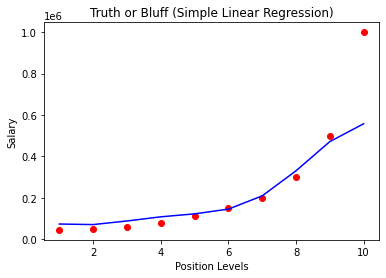

In [52]:
# Lets visualize the results
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='r')
# SVR predictions
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color='b')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Levels')
plt.ylabel('Salary')
plt.show()

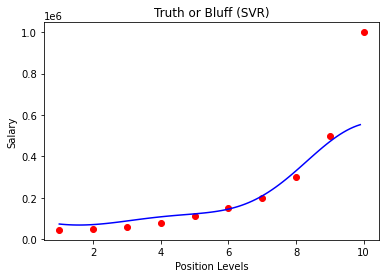

In [59]:
# visualize the results with higher resolution and smoother curve
X_grid = np.arange(np.min(sc_X.inverse_transform(X)), np.max(sc_X.inverse_transform(X)), 0.1)[:, np.newaxis]
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='r')
# SVR predictions
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color='b')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Levels')
plt.ylabel('Salary')
plt.show()